# Market Segmentation on E-Vehicle

### In this I will be performing Data Analysis and Visualization on Electric Vehicles

##### Step - 1 We need to import neccessary libraries to perform.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##### Step- 2 We need to Load the Dataset

In [ ]:
df=pd.read_csv("Electric-car-data.csv")

##### Step - 3 Let us now explore the data

In [ ]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


###### This data frame many rows and column.  We need shorten up.

In [ ]:
df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None


In [ ]:
print(df.describe())

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000  


##### Now lets see the shape

In [ ]:
df.shape

(103, 14)

##### I am using iloc() function here. It allows the selection and retrieval of specific rows and columns in DataFrames or Series using integer-based indexing.

In [ ]:
ilocfunc = df.iloc[:,0:9]
ilocfunc

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD
2,Polestar,2,4.7,210,400,181,620,Yes,AWD
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD
4,Honda,e,9.5,145,170,168,190,Yes,RWD
...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD


##### Step - 4 Check for Null values, Duplicate Values

In [ ]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

##### Now let us see the column names before going to further steps

In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

##### Step- 5 in this we are going to visualize the data. We are using Scatter plot for visualizing the price distribution.

In [ ]:
#we need to adjust the size of the plot
#we need to create a scatter plot
#we need to adjust the color and the tranparency as needed
#we need to add grid to the plot for better visualization

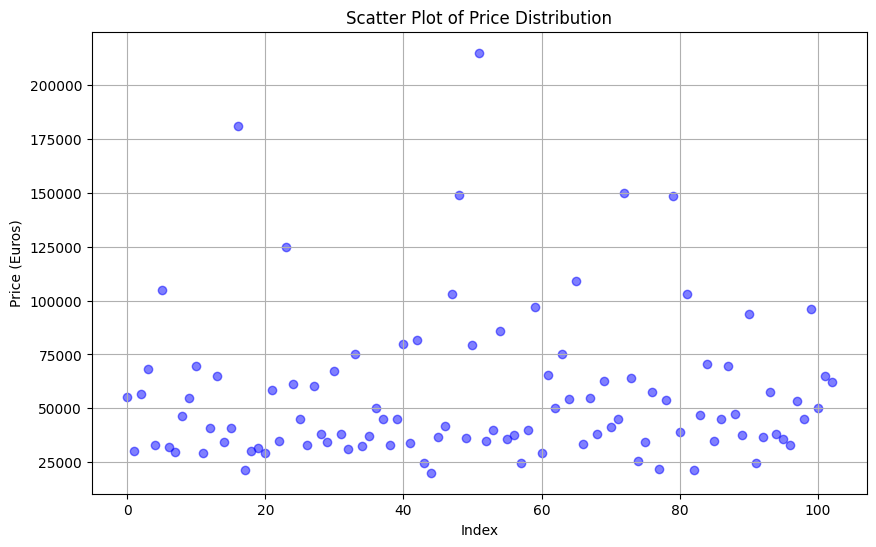

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Create scatter plot
plt.scatter(range(len(df)), df["PriceEuro"], color='blue', alpha=0.5)
plt.xlabel("Index")
plt.ylabel("Price (Euros)")
plt.title("Scatter Plot of Price Distribution")
plt.grid(True)

plt.show()

##### Step - 6 Here am using the line graph for visualization for price vs range

In [ ]:
#here again we need to adjust the plt size
#create a line chat

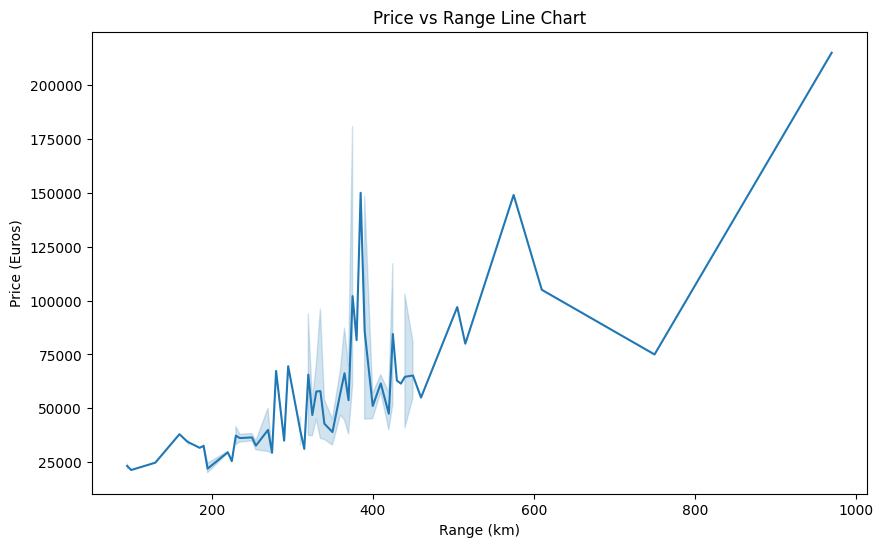

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Create line chart
sns.lineplot(x="Range_Km", y="PriceEuro", data=df)
plt.xlabel("Range (km)")
plt.ylabel("Price (Euros)")
plt.title("Price vs Range Line Chart")

plt.show()


##### Step - 7 Here am using violin plot to visualize between the price and power train.

In [ ]:
#A violin plot is a statistical graphic for comparing the distrubution.

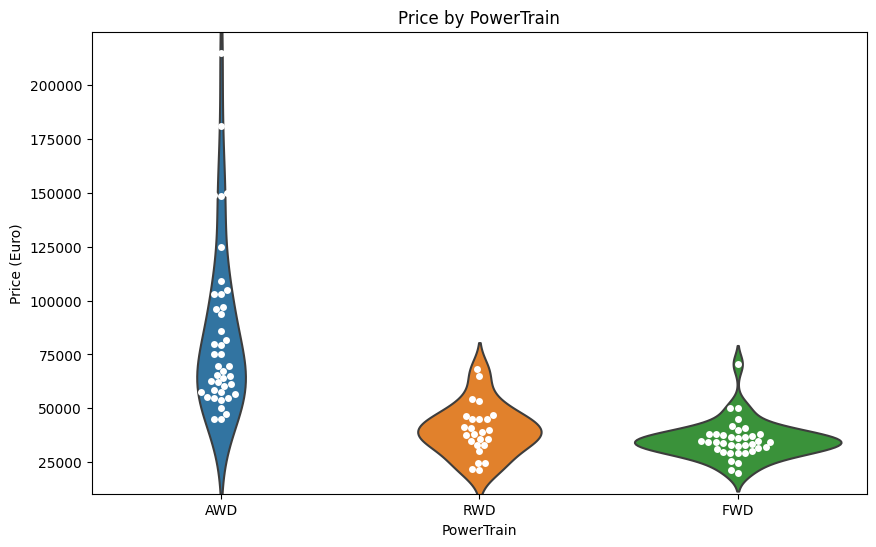

In [ ]:
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x="PowerTrain", y="PriceEuro", data=df, inner=None)
sns.swarmplot(x="PowerTrain", y="PriceEuro", data=df, color="white", edgecolor="gray")
plt.title('Price by PowerTrain')
plt.xlabel('PowerTrain')
plt.ylabel('Price (Euro)')

plt.show()


##### Step-8 In this step I am using the bar graph to the speed of each vehicle.

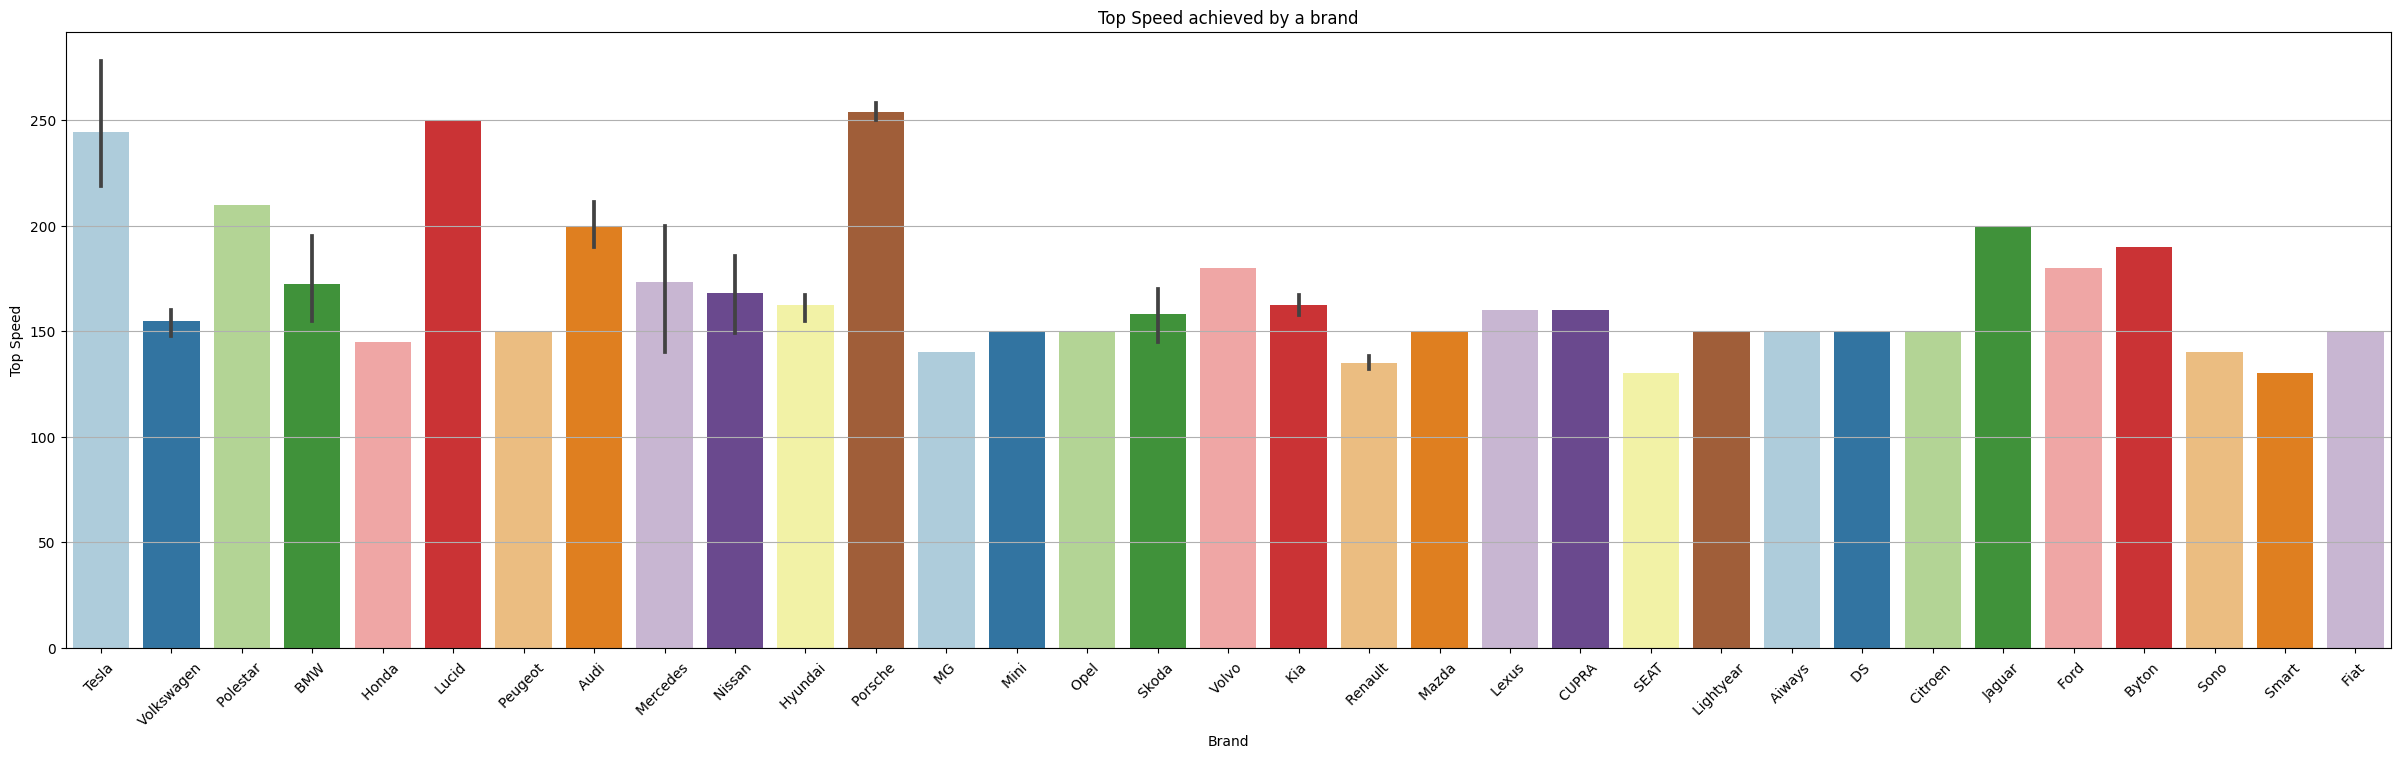

In [ ]:
plt.figure(figsize=(30, 8))
sns.barplot(x='Brand', y='TopSpeed_KmH', data=df, palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

##### Sep - 9 Here am using the Doughnut chart for Plug type

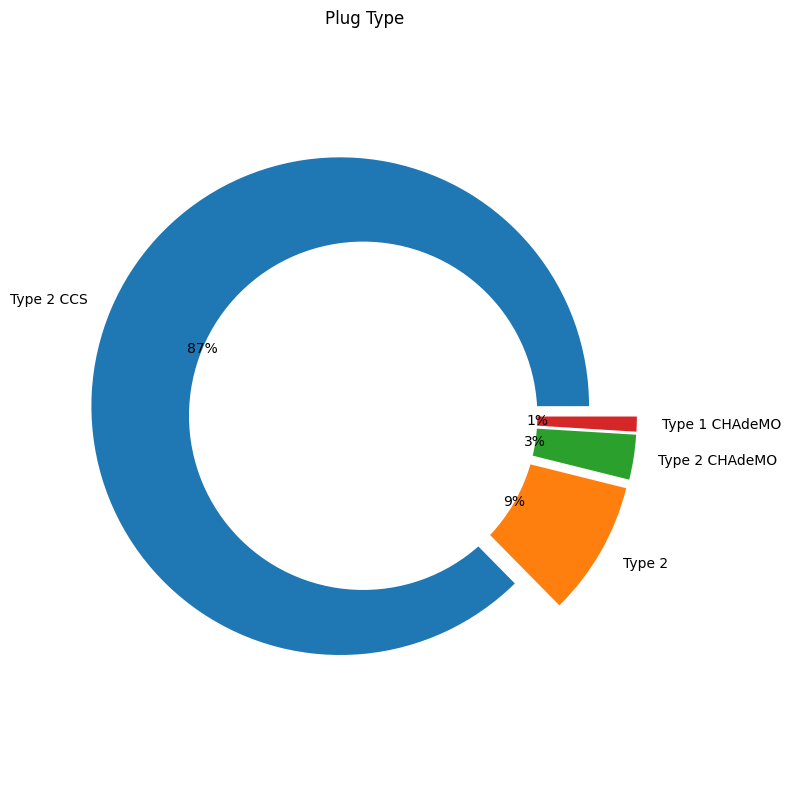

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(df['PlugType'].value_counts(), labels=df['PlugType'].value_counts().index, autopct='%.0f%%', explode=(.1, .1, .1, .1))

# Draw a white circle in the center to create a doughnut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Plug Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


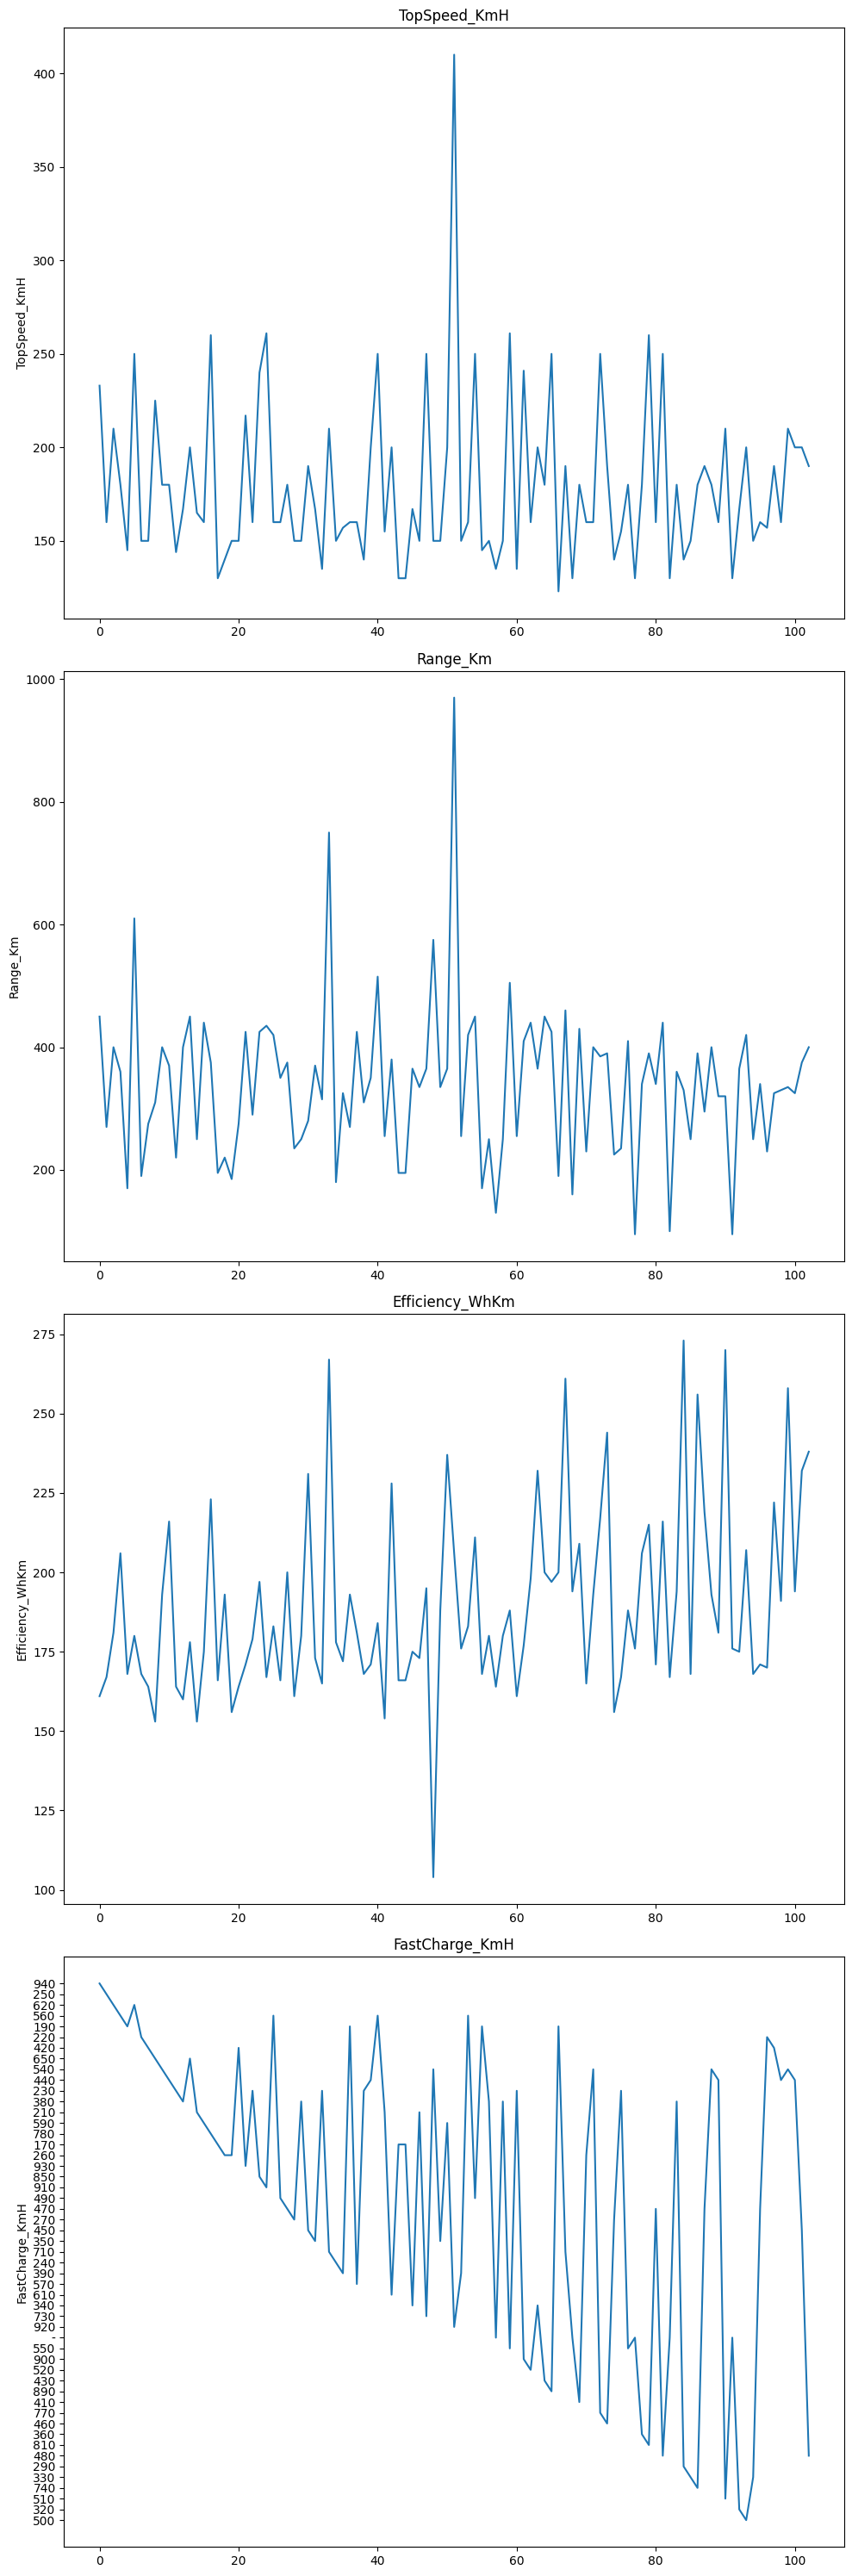

In [ ]:
plt.figure(figsize=(10, 30))  # Adjust the figure size as needed
n = 0

for i, x in enumerate(['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH'], 1):
    plt.subplot(4, 1, i)
    sns.lineplot(data=df[x])
    plt.title(f'{x}')
    plt.xlabel('')  # Remove x-axis label for better layout

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#### k-means clustering

In [ ]:
X = df.iloc[:, [3, 4]].values

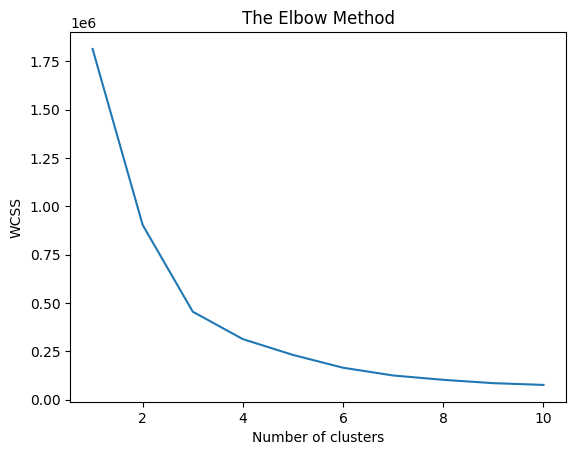

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Am using Convex clustering here. which combines Hierarchical and k-means ckustering characteristics.

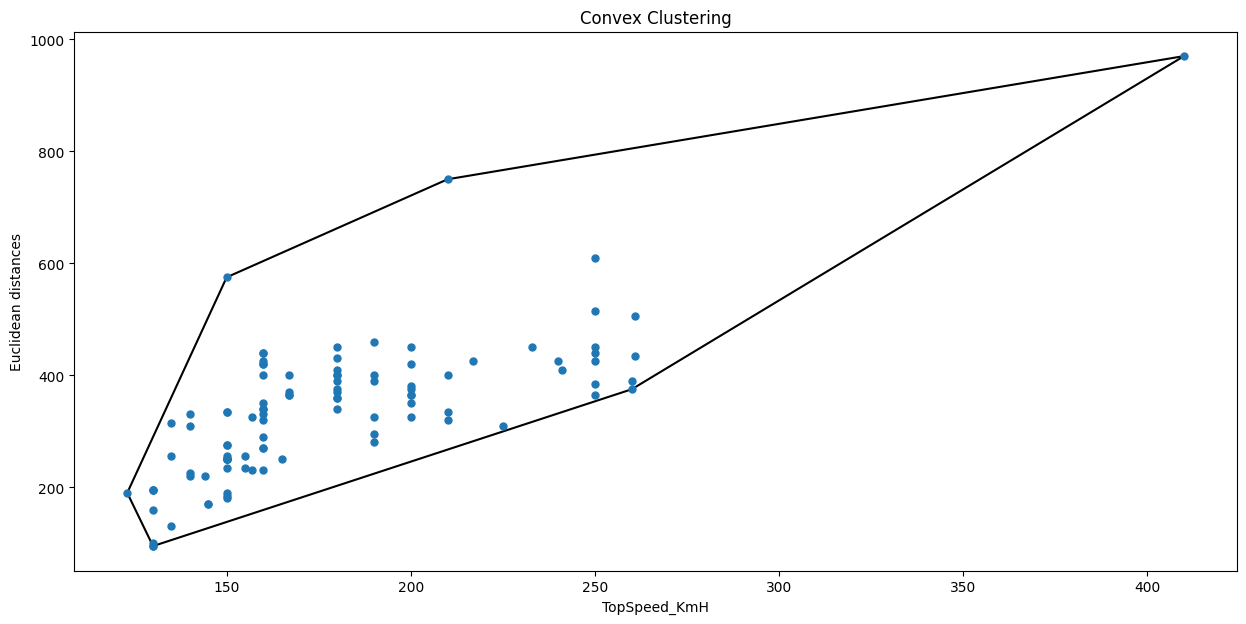

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Assuming X contains your data for clustering

# Perform convex clustering
hull = ConvexHull(X)

# Plot the convex hull
plt.figure(figsize=(15, 7))
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'k-')  # Plot the edges of the convex hull

plt.plot(X[:, 0], X[:, 1], 'o', markersize=5)  # Plot the data points
plt.title('Convex Clustering')
plt.xlabel('TopSpeed_KmH')
plt.ylabel('Euclidean distances')
plt.show()


### Loading Behavioural Data set

Loading the new data set for knowing the behaviour of the customer

In [ ]:
#Import the libraries
import plotly.express as px
import kaleido

In [ ]:
#Loading the dataset

In [ ]:
data = pd.read_csv("behavioural_dataset.csv")

In [ ]:
#describe the data set

In [ ]:
data.describe

<bound method NDFrame.describe of     Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan  Total Salary    Price  
0            Yes        800000   800000  
1            Yes       200000

In [ ]:
print(pd.isnull(data).sum())

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64


In [ ]:
data.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
data.rename(columns={'Price':'EV_Price'},inplace=True)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


Plotting the count plot for each martial status

<Figure size 1000x600 with 0 Axes>

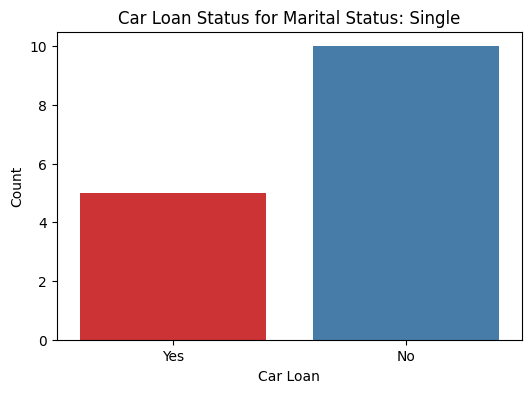

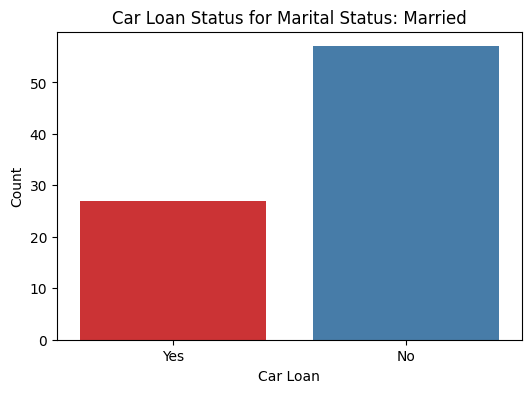

In [ ]:
marital_statuses = data['Marrital Status'].unique()

# Plot count plots for each marital status category
plt.figure(figsize=(10, 6))
for status in marital_statuses:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Car_Loan', data=data[data['Marrital Status'] == status], palette='Set1')
    plt.title(f'Car Loan Status for Marital Status: {status}')
    plt.xlabel('Car Loan')
    plt.ylabel('Count')
    plt.show()


Plotting the doughnut chat

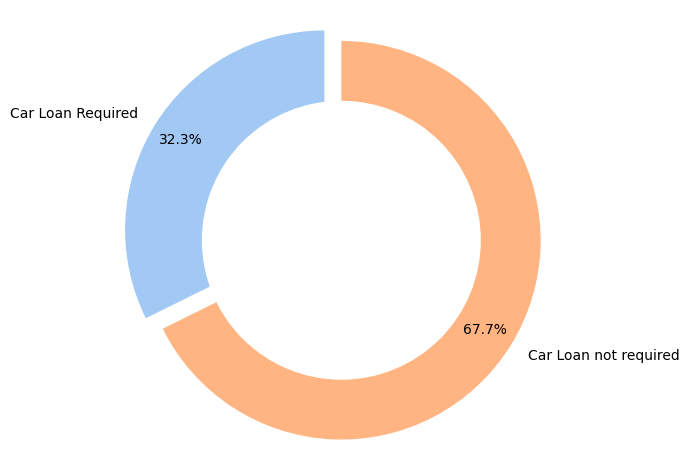

In [ ]:
# Getting labels and data
labels = ['Car Loan Required', 'Car Loan not required']
loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(), data.query('Car_Loan == "No"').Car_Loan.count()]

# Declaring explode for doughnut effect
explode = [0.1, 0]

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting data on doughnut chart
fig, ax = plt.subplots()
ax.pie(loan_status, labels=labels, colors=palette_color, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a circle at the center to make it a doughnut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Displaying the doughnut chart
plt.tight_layout()
plt.show()


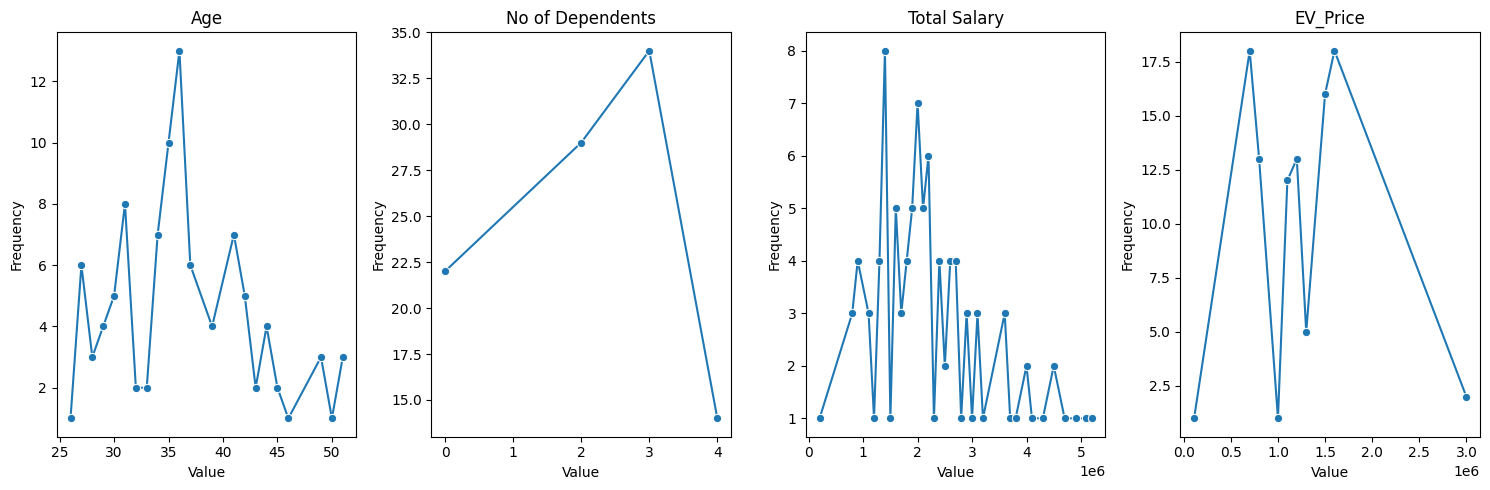

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency of each entry for consumer features with line charts
plt.figure(figsize=(15, 5))

# List of consumer features
consumer_features = ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']

# Iterate through each feature and plot line chart
for i, feature in enumerate(consumer_features, 1):
    plt.subplot(1, 4, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.lineplot(data=data[feature].value_counts().sort_index(), marker='o')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [ ]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

In [ ]:
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

Let us find the Optimal Cluster for KPrototypes

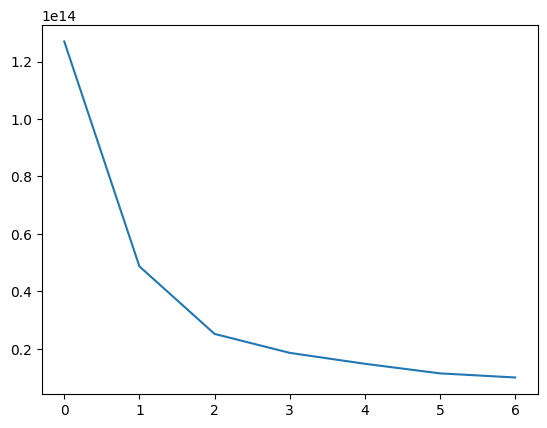

In [ ]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

Segregate each cluster

In [ ]:
# Segregrating each cluster

Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]

In [ ]:
data['Cluster'] = clusters

In [ ]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 11, ncost: 48837287201079.53
Run: 1, iteration: 2/20, moves: 1, ncost: 48777842651066.98
Run: 1, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 12, ncost: 50057040964014.66
Run: 2, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 8, ncost: 50057040964014.66
Run: 3, iteration: 2/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 3/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 37, ncost: 50057040964014.66
R

#### AVERAGE COST OF EV

In [ ]:
data.EV_Price.mean()

1194040.4040404041

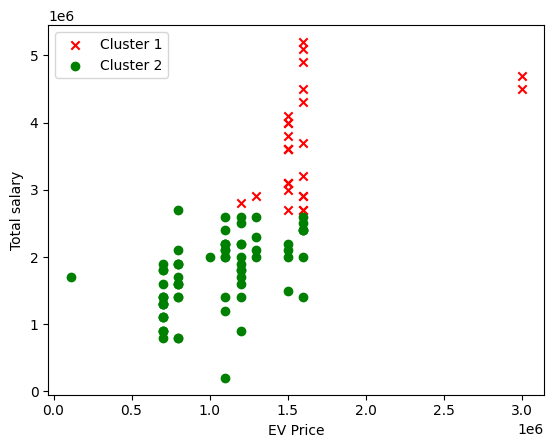

In [ ]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

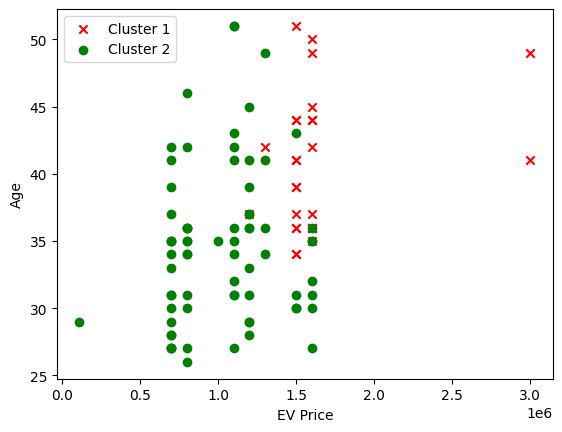

In [ ]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

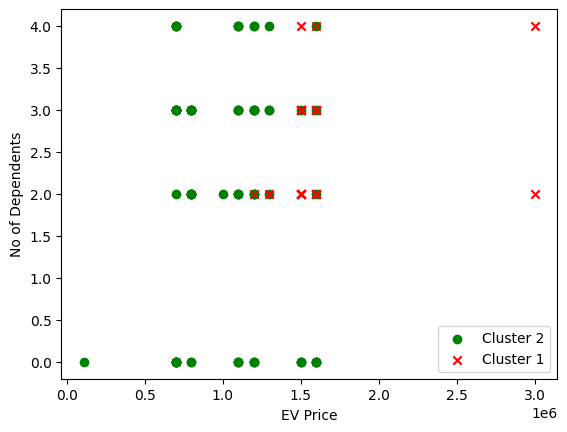

In [ ]:
plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()
